In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ys19-2023-assignment-1/sample_submission.csv
/kaggle/input/ys19-2023-assignment-1/test_set.csv
/kaggle/input/ys19-2023-assignment-1/valid_set.csv
/kaggle/input/ys19-2023-assignment-1/train_set.csv


## Imports

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
import re
# spaCy for Greek language handling
import spacy
!python -m spacy download el_core_news_md
nlp = spacy.load('el_core_news_md')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 MB 21.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_md')


## Data Pre-processing

In [13]:
df = pd.read_csv('/kaggle/input/ys19-2023-assignment-1/train_set.csv')

df.head()

,New_ID,Text,Sentiment,Party
0,35027,#απολυμανση_κοριοι #απεντομωση_κοριος #απολυμα...,NEUTRAL,SYRIZA
1,9531,Έξι νέες επιστολές για τη Μακεδονία «καίνε» τη...,NEGATIVE,ND
2,14146,"Ισχυρό ΚΚΕ, δύναμη του λαού στη Βουλή και στου...",POSITIVE,KKE
3,28716,@five2nds @anthi7vas Μνημονιακότατο το #ΜεΡΑ25...,NEUTRAL,KKE
4,32886,@ai_katerina Αυτό που είναι συγκλονιστικό είνα...,NEUTRAL,SYRIZA


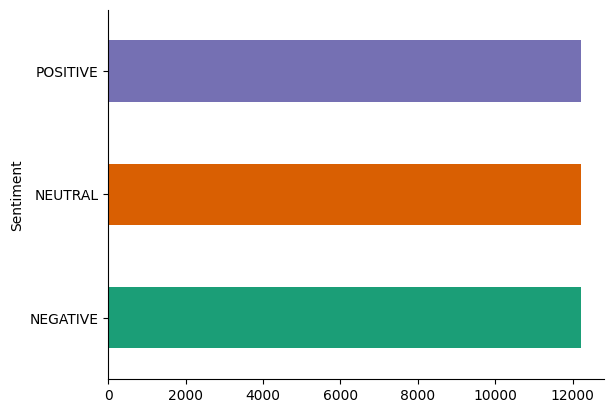

In [14]:
# Visualize our data (specifically the Sentiment column)
# Data Distribution

df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Sentiment', ylabel='count'>

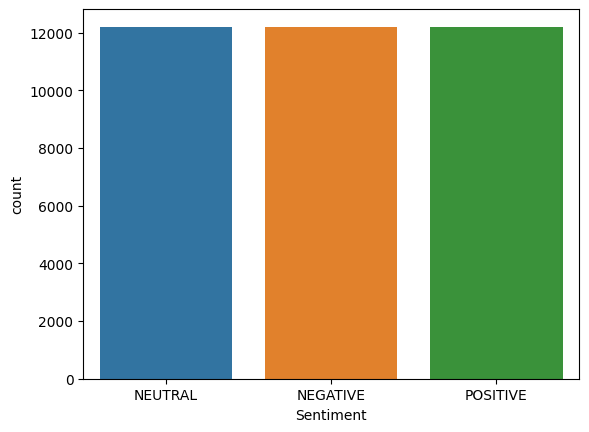

In [15]:
# Countplot for column Sentiment
sns.countplot(x='Sentiment',data=df)

In [16]:
# Check for null values
df.isnull().sum()

New_ID       0
Text         0
Sentiment    0
Party        0
dtype: int64

In [17]:
# Data cleanup
# Remove all useless characters from tweets (URLs, Hashtags, mentions (at signs), punctuations)
# also remove mentioned accounts after hashtags and @ signs.
def clean_tweet(tweet):
    '''
    Function to clean a tweet text by removing the links, punctuations, hashtags, and mentions symbols
    using regex expressions.
    Parameters:
       tweet (string): Tweet text to transform.
    Returns:
       tweet_cleaned (string): Tweet without links, punctuations, hashtags, and mentions symbols.
    """
    '''
    # convert the tweet text to lowercase letters
    tweet_lower = tweet.lower()
    # remove links, punctuations, hashtags, and mentions
    tweet_cleaned = re.sub(u"(http\S+)|([“”!?])|([#@]\S+\s)", "", tweet_lower)

    return tweet_cleaned

# Apply function to all tweets (text column)
df['Text'] = [clean_tweet(tweet) for tweet in df['Text']]
print(df['Text'])

0        κυριακη  κοριοί απολύμανση - καταπολέμηση κορι...
1        έξι νέες επιστολές για τη μακεδονία «καίνε» τη...
2        ισχυρό κκε, δύναμη του λαού στη βουλή και στου...
3                                      μνημονιακότατο το  
4        αυτό που είναι συγκλονιστικό είναι η ψυχασθένε...
                               ...                        
36625    ο κούλης ο μητσοτάκης λέει ψέματαδεν άδειασε κ...
36626    πρόσεξε μην σκίσει και κανένα καλσόν. επίσης ....
36627    η θέση του κκε για την ασφάλεια των πολιτών κα...
36628    μαρη κακομοίρα θυγατέρα του ναζιστη αντισημίτη...
36629                   εντάξει με έπεισες και εγω κκε 🤘❤️
Name: Text, Length: 36630, dtype: object


In [19]:
#X = df[['Text','tokens','lemmas']] # features
X = df['Text'] # feature
y = df['Sentiment'] # label

print('X shape:', X.shape)
print('Y shape:', y.shape)

# Apply cross validation for our model
# 80% training data 20% test data is optimal for our case.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# use Count Vectorizer to make text into vectors
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

X shape: (36630,)
Y shape: (36630,)


## Model training

In [20]:
# create and train our Logistic Regression model
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)

# add predictions to list.
predictions = lr_model.predict(X_test)

## Model evaluation and plots

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    NEGATIVE       0.38      0.42      0.40      2384
     NEUTRAL       0.40      0.38      0.39      2484
    POSITIVE       0.39      0.38      0.39      2458

    accuracy                           0.39      7326
   macro avg       0.39      0.39      0.39      7326
weighted avg       0.39      0.39      0.39      7326



In [22]:
print(accuracy_score(y_test,predictions))

0.3923013923013923
